# Importing Libraries

In [12]:
pip install --upgrade numpy

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.2 which is incompatible.


In [3]:
from pytube import YouTube

In [4]:
pip install mediapipe

In [5]:
pip install --user mediapipe

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy==1.20.0

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade google.protobuf

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement google.protobuf (from versions: none)
ERROR: No matching distribution found for google.protobuf


# Importing Test Video 

In [39]:
# Function to download a video
def download_video(url, save_path):
    yt = YouTube(url)
    yt.streams.filter(file_extension='mp4').first().download(save_path)

# Example usage
video_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"
save_path = "C:/Users/Khadija/OneDrive/Desktop/testt/"
download_video(video_url, save_path)

In [40]:
save_path

'C:/Users/Khadija/OneDrive/Desktop/testt/'

# Stress Detection Model

In [13]:
pip install --user --upgrade protobuf

  Using cached protobuf-4.25.1-cp39-cp39-win_amd64.whl (413 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.8 requires protobuf<4,>=3.11, but you have protobuf 4.25.1 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.


In [14]:
pip install protobuf==3.20.0


  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.


  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.1
    Uninstalling protobuf-4.25.1:
      Successfully uninstalled protobuf-4.25.1


# mediapipe Library

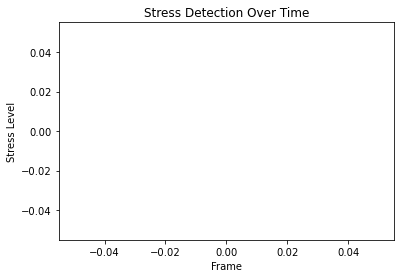

In [27]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube

# Function to download a video
def download_video(url, save_path):
    yt = YouTube(url)
    yt.streams.filter(file_extension='mp4').first().download(save_path)

# Function to calculate stress level based on facial landmarks
def calculate_stress(landmarks):
    # You can customize this function based on your stress detection algorithm
    # Example: Calculate stress based on the distance between specific facial landmarks
    distance_between_eyes = np.linalg.norm(landmarks[0] - landmarks[1])
    stress = distance_between_eyes * 0.1  # Placeholder algorithm, replace with your logic
    return stress

# Main function
def stress_detection(video_path):
    cap = cv2.VideoCapture(video_path)

    mp_face = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils

    face_detection = mp_face.FaceDetection(min_detection_confidence=0.3)

    stress_levels = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces in the frame
        results = face_detection.process(rgb_frame)

        if results.detections and results.multi_face_landmarks:
            for i, detection in enumerate(results.detections):
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                       int(bboxC.width * iw), int(bboxC.height * ih)

                # Draw bounding box around the face
                cv2.rectangle(frame, bbox, (0, 255, 0), 2)

                # Extract landmarks
                landmarks = [(lm.x * iw, lm.y * ih) for lm in results.multi_face_landmarks[i].landmark]

                # Draw landmarks on the frame
                for landmark in landmarks:
                    cv2.circle(frame, (int(landmark[0]), int(landmark[1])), 2, (0, 0, 255), -1)

                # Calculate stress level based on landmarks
                stress = calculate_stress(np.array(landmarks))
                stress_levels.append(stress)
                print(f"Face {i + 1} - Stress: {stress}")

        cv2.imshow('Frame', frame)

        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

    # Plot the stress levels over time
    plt.plot(stress_levels)
    plt.xlabel('Frame')
    plt.ylabel('Stress Level')
    plt.title('Stress Detection Over Time')
    plt.show()

    cap.release()
    cv2.destroyAllWindows()

# Example usage
video_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"
save_path = "C:/Users/Khadija/teststage"
download_video(video_url, save_path)
stress_detection(save_path)


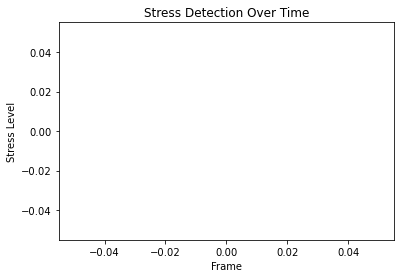

In [26]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube

# Function to download a video
def download_video(url, save_path):
    yt = YouTube(url)
    yt.streams.filter(file_extension='mp4').first().download(save_path)

# Function to calculate stress level based on facial landmarks
def calculate_stress(landmarks):
    # Calculate the average distance between all landmarks
    distances = []
    for i in range(len(landmarks)):
        for j in range(i + 1, len(landmarks)):
            distance = np.linalg.norm(landmarks[i] - landmarks[j])
            distances.append(distance)
    if len(distances) == 0:
        return 0.0
    avg_distance = sum(distances) / len(distances)
    return avg_distance * 0.1  # Adjust the scaling factor as needed

# Main function
def stress_detection(video_path):
    cap = cv2.VideoCapture(video_path)

    mp_face = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils

    face_detection = mp_face.FaceDetection(min_detection_confidence=0.3)

    stress_levels = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces in the frame
        results = face_detection.process(rgb_frame)

        if results.detections and results.multi_face_landmarks:
            for i, detection in enumerate(results.detections):
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                       int(bboxC.width * iw), int(bboxC.height * ih)

                # Extract landmarks
                landmarks = [(lm.x * iw, lm.y * ih) for lm in results.multi_face_landmarks[i].landmark]

                # Calculate stress level based on landmarks
                stress = calculate_stress(np.array(landmarks))
                stress_levels.append(stress)
                print(f"Face {i + 1} - Stress: {stress}")

        cv2.imshow('Frame', frame)

        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

    # Plot the stress levels over time
    plt.plot(stress_levels)
    plt.xlabel('Frame')
    plt.ylabel('Stress Level')
    plt.title('Stress Detection Over Time')
    plt.show()

    cap.release()
    cv2.destroyAllWindows()

# Example usage
video_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"
save_path = "C:/Users/Khadija/teststage"
download_video(video_url, save_path)
stress_detection(save_path)

In [36]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from pytube import YouTube
import os

# Function to download a video
def download_video(url, save_path):
    if os.path.exists(save_path):
        os.remove(save_path)

    yt = YouTube(url)
    yt.streams.filter(file_extension='mp4').first().download(save_path)

# Function to calculate stress level based on facial landmarks
def calculate_stress(landmarks):
    # You can customize this function based on your stress detection algorithm
    # Example: Calculate stress based on the distance between specific facial landmarks
    distance_between_eyes = np.linalg.norm(landmarks[0] - landmarks[1])
    stress = distance_between_eyes * 0.1  # Placeholder algorithm, replace with your logic
    return stress

# Main function
def stress_detection(video_path):
    cap = cv2.VideoCapture()
    if not cap.open(video_path):
        print(f"Error: Could not open the video file at {video_path}")
        return

    mp_face = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils

    face_detection = mp_face.FaceDetection(min_detection_confidence=0.3)

    stress_levels = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces in the frame
        results = face_detection.process(rgb_frame)

        if results.detections and results.multi_face_landmarks:
            for i, detection in enumerate(results.detections):
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                bbox = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                       int(bboxC.width * iw), int(bboxC.height * ih)

                # Draw bounding box around the face
                cv2.rectangle(frame, bbox, (0, 255, 0), 2)

                # Extract landmarks
                landmarks = [(lm.x * iw, lm.y * ih) for lm in results.multi_face_landmarks[i].landmark]

                # Draw landmarks on the frame
                for landmark in landmarks:
                    cv2.circle(frame, (int(landmark[0]), int(landmark[1])), 2, (0, 0, 255), -1)

                # Calculate stress level based on landmarks
                stress = calculate_stress(np.array(landmarks))
                stress_levels.append(stress)
                print(f"Face {i + 1} - Stress: {stress}")

        cv2.imshow('Frame', frame)

        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

    if not stress_levels:
        print("Error: No frames were processed.")
        cap.release()
        cv2.destroyAllWindows()
        return

    # Plot the stress levels over time as a percentage
    total_frames = len(stress_levels)
    time_in_seconds = total_frames / cap.get(cv2.CAP_PROP_FPS)

    # Convert frame index to time in seconds
    time_points = np.linspace(0, time_in_seconds, total_frames)

    # Convert stress levels to percentage
    stress_percentage = np.array(stress_levels) / np.max(stress_levels) * 100

    plt.plot(time_points, stress_percentage)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Stress Level (%)')
    plt.title('Stress Detection Over Time')
    plt.show()

    cap.release()
    cv2.destroyAllWindows()

# Example usage
video_url = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"
save_path = "C:/Users/Khadija/OneDrive/Desktop/testt/video.mp4"
download_video(video_url, save_path)
stress_detection(save_path)


Error: Could not open the video file at C:/Users/Khadija/OneDrive/Desktop/testt/video.mp4


In [38]:
import os
import tempfile
temp_dir = tempfile.mkdtemp(dir="C:/Users/Khadija/OneDrive/Desktop")
save_path = os.path.join(temp_dir, "video.mp4")
download_video(video_url, save_path)
stress_detection(save_path)

Error: Could not open the video file at C:/Users/Khadija/OneDrive/Desktop\tmpdd_9svgp\video.mp4


In [33]:
import os

In [37]:
video_path = "C:/Users/Khadija/OneDrive/Desktop/testt/video.mp4"
print(f"Video path: {video_path}")
print(f"File exists: {os.path.exists(video_path)}")
stress_detection(video_path)

Video path: C:/Users/Khadija/OneDrive/Desktop/testt/video.mp4
File exists: True
Error: Could not open the video file at C:/Users/Khadija/OneDrive/Desktop/testt/video.mp4


# face recognition Library

In [16]:
pip install boost

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Khadija\anaconda\python.exe' 'C:\Users\Khadija\anaconda\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\Khadija\AppData\Local\Temp\tmpl9oqicsj'
       cwd: C:\Users\Khadija\AppData\Local\Temp\pip-install-4v07en55\dlib_f7b5159a647741649f91ab92f8bdf342
  Complete output (73 lines):
  running bdist_wheel
  running build
  running build_ext
  <string>:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  Building extension for Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\Khadija\AppData\Local\Temp\pip-install-4v07en55\dlib_f7b5159a647741649f91ab92f8bdf342\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\Khadija\AppData\Local\Temp\pip-install-4v07en55\dlib_f7b5159a647741649f91ab92f8bdf342\build\lib.win-amd64-cpython-39 -DPYTHON_EXECUTABLE=C:\Users\Khadija\anaconda\

In [18]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate stress level based on facial landmarks
def calculate_stress(landmarks):
    # You can customize this function based on your stress detection algorithm
    # Example: Calculate stress based on the distance between specific facial landmarks
    distance_between_eyes = np.linalg.norm(landmarks['left_eye'][0] - landmarks['right_eye'][3])
    stress = distance_between_eyes * 0.1  # Placeholder algorithm, replace with your logic
    return stress

# Main function
def stress_detection(video_path):
    cap = cv2.VideoCapture(video_path)

    stress_levels = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Find all face landmarks in the current frame
        face_landmarks_list = face_recognition.face_landmarks(frame)

        for face_landmarks in face_landmarks_list:
            # Draw landmarks on the frame
            for landmark_type, landmarks in face_landmarks.items():
                for landmark in landmarks:
                    cv2.circle(frame, landmark, 2, (0, 0, 255), -1)

            # Calculate stress level based on landmarks
            stress = calculate_stress(face_landmarks)
            stress_levels.append(stress)

        cv2.imshow('Frame', frame)

        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

    # Plot the stress levels over time
    plt.plot(stress_levels)
    plt.xlabel('Frame')
    plt.ylabel('Stress Level')
    plt.title('Stress Detection Over Time')
    plt.show()

    cap.release()
    cv2.destroyAllWindows()

stress_detection(save_path)

ModuleNotFoundError: No module named 'face_recognition'